In [ ]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
#
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
#
from tensorflow.keras.models import Sequential
#
from tensorflow.keras.layers import Dense, Dropout
#
from tensorflow.keras.utils import plot_model
#
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
#
print(tf.__version__)

2.8.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing data
data = pd.read_csv('/content/drive/MyDrive/Tarea de Pytorch_Keras/4.Cancer_de_seno_Keras/data.csv')
del data['Unnamed: 32']

In [ ]:
x = data.iloc[:,2:].values # extrae como arreglos numpy
y = data.iloc[:,1].values

In [ ]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

In [ ]:
x_test.shape

(57, 30)

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
classifier = Sequential()
## Adiciona capas una por una
classifier.add(Dense(units=16, activation='relu', input_shape=(30,)))
# Adding dropout to prevent overfitting (regularización)
classifier.add(Dropout(0.1)) # 10% out in each epoc
classifier.add(Dense(units=16, activation='relu'))
# Adding dropout to prevent overfitting (regularización)
classifier.add(Dropout(0.1))
classifier.add(Dense(units=1, activation='sigmoid'))

In [ ]:

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


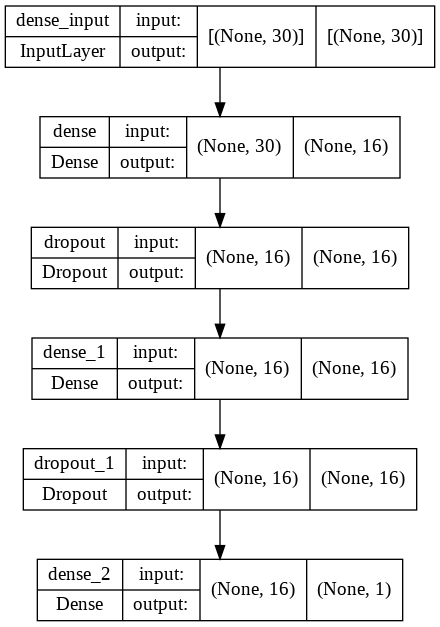

In [ ]:
classifier.summary()
plot_model(classifier,  
           show_shapes=True)

In [ ]:
history = classifier.fit(x_train, y_train, batch_size=32, epochs=150,validation_split = 0.2)

Epoch 1/150
13/13 [==============================] - 2s 19ms/step - loss: 0.7668 - accuracy: 0.4352 - val_loss: 0.6459 - val_accuracy: 0.6602
Epoch 2/150
13/13 [==============================] - 0s 4ms/step - loss: 0.6308 - accuracy: 0.6504 - val_loss: 0.5276 - val_accuracy: 0.8350
Epoch 3/150
13/13 [==============================] - 0s 4ms/step - loss: 0.5056 - accuracy: 0.8582 - val_loss: 0.4377 - val_accuracy: 0.9223
Epoch 4/150
13/13 [==============================] - 0s 4ms/step - loss: 0.4256 - accuracy: 0.9169 - val_loss: 0.3609 - val_accuracy: 0.9417
Epoch 5/150
13/13 [==============================] - 0s 4ms/step - loss: 0.3500 - accuracy: 0.9315 - val_loss: 0.2978 - val_accuracy: 0.9612
Epoch 6/150
13/13 [==============================] - 0s 5ms/step - loss: 0.2941 - accuracy: 0.9364 - val_loss: 0.2449 - val_accuracy: 0.9515
Epoch 7/150
13/13 [==============================] - 0s 4ms/step - loss: 0.2501 - accuracy: 0.9438 - val_loss: 0.2037 - val_accuracy: 0.9515
Epoch 8/150


In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
#y_pred = (y_pred > 0.5)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <=0.5] = 0

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:

print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/y_test.shape[0])*100))

Our accuracy is 98.24561403508771%


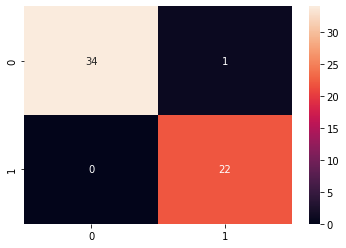

In [ ]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [ ]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Entrenamiento y validación '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

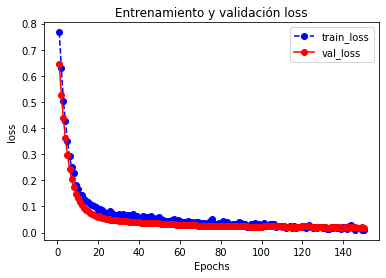

In [ ]:
plot_metric(history, 'loss')